In [ ]:
from pandas import DataFrame
from numpy import max , array , exp , insert , delete
from matplotlib.pyplot import savefig
from random import random , shuffle

I import the drive from google.colab because I want to save all important outputs in my google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I created a Cut class to represent the solutions. <br/>
We can represent each solution by a permutation of our requests. This representation means we cut first request from the first stock, and for the (i+1)'th request in the order if remaning of our last stock used stock is long enogh for the (i+1)'th request we use that otherwise we use a new stock.<br/>
I use the number of stocks a solution needs as the cost of the solution.<br/>
Neighbours of a solution are the solutions that create by relocation of a request in the order.

In [ ]:
class Cut : 
  # setters
  def __cost_function ( self ) :
    cost = 0
    cur_sheet_size = self.__standard_size
    for i in self.__order :
      if i > cur_sheet_size : 
        cost += cur_sheet_size
        cur_sheet_size = self.__standard_size
      cur_sheet_size -= i
    cost += cur_sheet_size
    return cost

  # __init__
  def __init__( self , order , standard_size ) :
    self.__order = array(order)
    self.__standard_size = standard_size
    self.__cost = self.__number_of_stock
  
  # getters
  @property
  def cost ( self ) :
    return self.__cost
  @property
  def __number_of_stock ( self ) :
    nstock = 1
    cur_sheet_size = self.__standard_size
    for i in self.__order :
      if i > cur_sheet_size : 
        nstock += 1
        cur_sheet_size = self.__standard_size
      cur_sheet_size -= i
    return nstock

  # magic methods
  def __str__ ( self ) :
    return str( self.__order )
    
  def equal ( self , other ) :
    return self.__order.shape == other.__order.shape and (self.__order == other.__order).all() 

  # operator overloading  
  def __lt__ ( self , other ) :
    return self.cost > other.cost
  def __eq__ ( self , other ) :
    return self.cost == other.cost
  def __le__ ( self , other ) :
    return self.cost >= other.cost
  def __ge__ ( self , other ) :
    return self.cost <= other.cost
  def __gt__ ( self , other ) :
    return self.cost < other.cost
  
  # methods
  def copy ( self ) :
    return Cut( self.__order.copy() , self.__standard_size )

  def to_csv ( self , file_name ) : 
    DataFrame( self.__order ).to_csv( file_name )

  @property
  def neighbours ( self ) :
    order = list(self.__order)
    for i in range(len(self.__order)) :
      for j in range( len ( self.__order ) ) :
        if i < j :
          yield Cut( order[:i] + order[ i + 1 : j ] + [order[i]]  + order[j:] , self.__standard_size ) 
        elif i > j :
          yield Cut( order[:j] + [ order[i] ] + order[ j : i ] + order[ i + 1 : ] , self.__standard_size ) 

My code for the simulated anealing fixed the temperature if It couldn't find a better solution in n ( temp_length ) iterations reduce the temp_length and temperature by multiply them by temp_length_step and cooling_rate_step. because of the number of neighbours, I break the process of finding a better neighbers when I find a better neighbour for the solution.<br/>
if we use linear function for cooling process the temperature will reduce too fast and if we reduce the slop of the function, our algorithm will run for a long time after finding the optimum solution.

In [ ]:
# simulated annealing algorithm
def simulated_annealing ( initial_temp , temp_length , initial_cooling_rate , initial_solutions , cooling_rate_step , temp_length_step ) :
  cooling_rate = initial_cooling_rate
  temp = initial_temp
  runing = True
  cur_solutions = initial_solutions
  best = max( initial_solutions )
  costs = [ best.cost ]
  print( "initial best cost is" , best.cost)
  n = 0
  while runing :
    new_solutions = []
    for solution in cur_solutions :
      better_neighbour = False 
      for neighbour in solution.neighbours :
        if neighbour > solution :
          solution , better_neighbour = neighbour , True
          break
        elif (not better_neighbour) and random() < exp( ( solution.cost - neighbour.cost ) / temp ) :
          solution = neighbour
      new_solutions.append( solution )
    cur_solutions  = array(new_solutions)
    new_best = max( cur_solutions )
    costs.append( new_best.cost )
    if new_best.cost == best.cost :
        if temp < 1 :
          runing = False
    elif new_best > best :
      best , n = new_best , 0
    n += 1
    if n >= temp_length :
      temp , cooling_rate , temp_length , n = temp * cooling_rate , cooling_rate * cooling_rate_step , temp_length * temp_length_step , 0
    print( "best cost is" , best.cost)
    print( "temp is" , temp)
  return DataFrame(costs), best

In [ ]:
def create_initial_solutions ( requests , standard_size ,n = None ) :
  if n is None :
    n = len(requests)
  solutions = [ requests.copy() for _ in range(n)]
  for i in solutions :
    shuffle(i)
  return array([Cut( i , standard_size ) for i in solutions ])

I have created a CSV file for each test cases.

initial best cost is 59
best cost is 59
temp is 1400
best cost is 58
temp is 1400
best cost is 58
temp is 1400
best cost is 58
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 57
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 56
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
temp is 1400
best cost is 55
tem

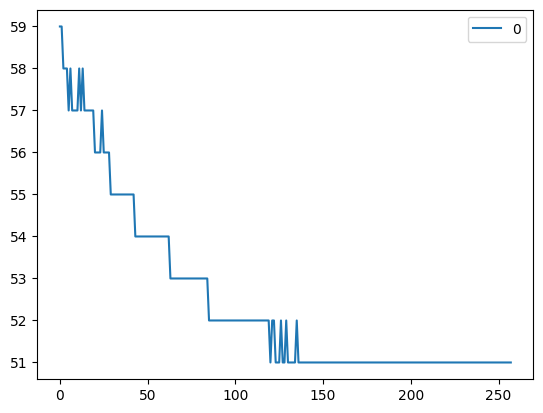

In [ ]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input1.csv").read().split(","))))
stockLength = 1000
solutions , best = simulated_annealing( initial_temp = len(requests) * 10 , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 10 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/1.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/1.png" , dpi = 300 )

initial best cost is 87
best cost is 86
temp is 2190
best cost is 86
temp is 2190
best cost is 86
temp is 2190
best cost is 85
temp is 2190
best cost is 85
temp is 2190
best cost is 84
temp is 2190
best cost is 84
temp is 2190
best cost is 84
temp is 2190
best cost is 84
temp is 2190
best cost is 83
temp is 2190
best cost is 83
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 82
temp is 2190
best cost is 81
temp is 2190
best cost is 81
temp is 2190
best cost is 81
temp is 2190
best cost is 81
temp is 2190
best cost is 81
temp is 2190
best cost is 81
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
temp is 2190
best cost is 80
tem

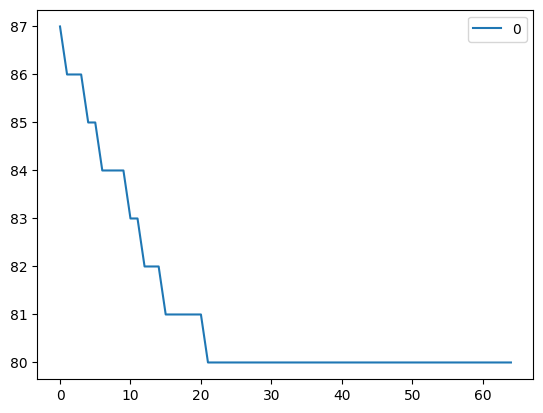

In [ ]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input2.csv").read().split(","))))
stockLength = 5600
solutions , best = simulated_annealing( initial_temp = len(requests) * 10 , temp_length = len(requests)//10 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 3 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/2.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/2.png" , dpi = 300 )

initial best cost is 112
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 112
temp is 860
best cost is 111
temp is 860
best cost is 111
temp is 860
best cost is 111
temp is 860
best cost is 111
temp is 860
best cost is 111
temp is 860
best cost is 111
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 110
temp is 860
best cost is 109
temp is 860
best cost is 109
temp is 860
best cost is 109
temp is 860
best cost is 109
temp is 860
best cost is 109
temp is 860
best cost is 109
temp is 860
best cost is 109
t

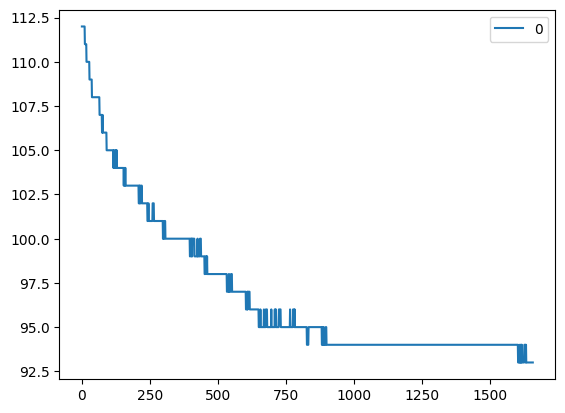

In [30]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input3.csv").read().split(","))))
stockLength = 500
solutions , best = simulated_annealing( initial_temp = len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 10 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/2.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/3.png" , dpi = 300 )

In [ ]:
requests = array(list(map(int ,open("drive/MyDrive/bio computing/HW4/input4.csv").read().split(","))))
stockLength = 100
solutions , best = simulated_annealing( initial_temp = len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 10 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print(best)
print("number_of_stock=", best.cost)
best.to_csv( "drive/MyDrive/bio computing/HW4/2.csv" )
solutions.plot()
savefig("drive/MyDrive/bio computing/HW4/4.png" , dpi = 300)

initial best cost is 249
best cost is 249
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 248
temp is 900
best cost is 247
temp is 900
best cost is 247
temp is 900
best cost is 247
temp is 900
best cost is 247
temp is 900
best cost is 247
temp is 900
best cost is 247
temp is 900
best cost is 247
temp is 900
best cost is 246
temp is 900
best cost is 246
temp is 900
best cost is 246
temp is 900
best cost is 246
temp is 900
best cost is 246
temp is 900
best cost is 246
temp is 900
best cost is 246
temp is 900
best cost is 245
temp is 900
best cost is 245
temp is 900
best cost is 245
temp is 900
best cost is 245
temp is 900
best cost is 245
temp is 900
best cost is 245
temp is 900
best cost is 245
temp is 900
best cost is 245
temp is 900
best cost is 245
t